# Consumer-Resource Model

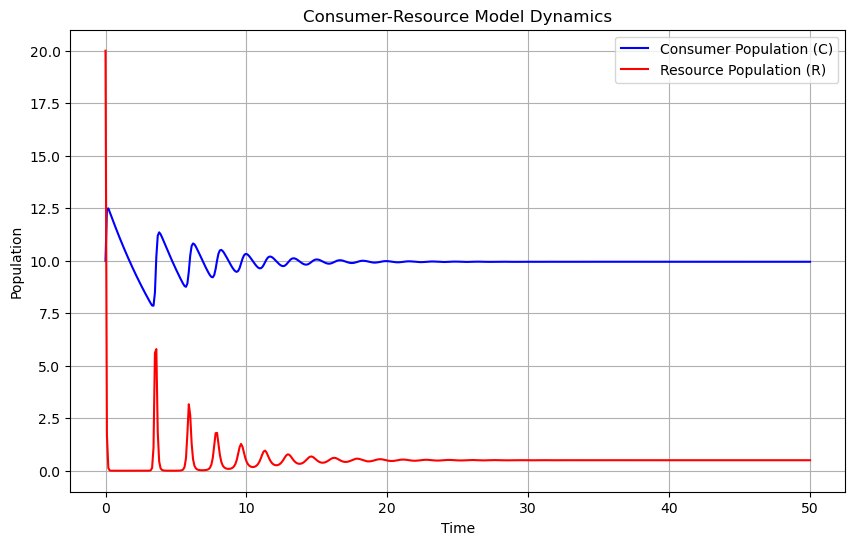

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the CRM model differential equations
def crm_model(y, t, alpha, beta, K, delta):
    C, R = y
    dCdt = alpha * C * R - beta * C
    dRdt = (K-R) * R - delta * C * R
    return [dCdt, dRdt]

# Initial conditions
C0 = 10  # initial consumer population
R0 = 20  # initial resource population
y0 = [C0, R0]

# Time points (from 0 to 50)
t = np.linspace(0, 50, 500)

# Parameters
alpha = 0.3  # consumer growth rate per resource
beta = 0.15  # consumer death rate
K = 100  # resource carrying capacity
delta = 10  # resource depletion rate by consumers

# Solve the system of differential equations
solution = odeint(crm_model, y0, t, args=(alpha, beta, K, delta))

# Extract the results
C, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, C, label='Consumer Population (C)', color='b')
plt.plot(t, R, label='Resource Population (R)', color='r')
plt.title('Consumer-Resource Model Dynamics')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint

# Define the CRM model differential equations
def crm_model(y, t, alpha, beta, K, delta):
    C, R = y
    dCdt = alpha * C * R - beta * C
    dRdt = (K - R) * R - delta * C * R
    return [dCdt, dRdt]

# Parameters
alpha = 0.3  # Consumer growth rate per resource
beta = 0.15  # Consumer death rate
K = 100  # Resource carrying capacity
delta = 10  # Resource depletion rate by consumers

# Time points
t = np.linspace(0, 50, 500)

# Generate initial conditions (gradually increasing from (0,0) to (10,20))
num_frames = 30  # Number of steps in animation
C0_values = np.linspace(0, 10, num_frames)  
R0_values = np.linspace(0, 20, num_frames)  

# Solve CRM for each initial condition
solutions = []
for C0, R0 in zip(C0_values, R0_values):
    y0 = [C0, R0]
    solution = odeint(crm_model, y0, t, args=(alpha, beta, K, delta))
    solutions.append(solution.T)

# Create figure
fig = go.Figure()

# Add traces for consumers (C) and resources (R)
fig.add_trace(go.Scatter(x=t, y=solutions[0][0], mode='lines', name='Consumers (C)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=t, y=solutions[0][1], mode='lines', name='Resources (R)', line=dict(color='red')))

# Define animation frames
frames = [
    go.Frame(
        data=[
            go.Scatter(x=t, y=solutions[i][0], mode='lines', name='Consumers (C)', line=dict(color='blue')),
            go.Scatter(x=t, y=solutions[i][1], mode='lines', name='Resources (R)', line=dict(color='red'))
        ],
        name=f'C0={C0_values[i]:.1f}, R0={R0_values[i]:.1f}'
    ) 
    for i in range(num_frames)
]

# Add frames to figure
fig.update(frames=frames)

# Animation settings
fig.update_layout(
    title='Consumer-Resource Model Animation (Using Plotly)',
    xaxis_title='Time',
    yaxis_title='Population',
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 200, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the animation
fig.show()


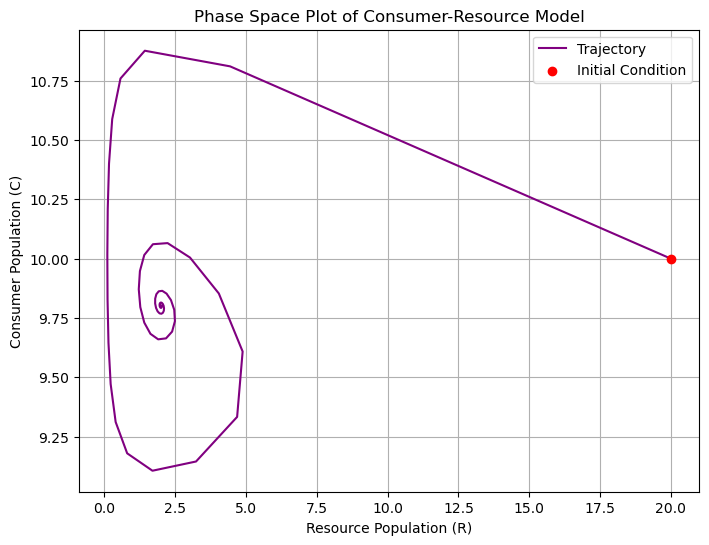

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the CRM model differential equations
def crm_model(y, t, alpha, beta, K, delta):
    C, R = y
    dCdt = alpha * C * R - beta * C
    dRdt = (K - R) * R - delta * C * R
    return [dCdt, dRdt]

# Initial conditions
C0 = 10  # initial consumer population
R0 = 20  # initial resource population
y0 = [C0, R0]

# Time points (from 0 to 50)
t = np.linspace(0, 50, 500)

# Parameters
alpha = 0.1  # consumer growth rate per resource
beta = 0.2  # consumer death rate
K = 100  # resource carrying capacity
delta = 10  # resource depletion rate by consumers

# Solve the system of differential equations
solution = odeint(crm_model, y0, t, args=(alpha, beta, K, delta))

# Extract the results
C, R = solution.T

# Phase space plot (C vs R)
plt.figure(figsize=(8, 6))
plt.plot(R, C, label='Trajectory', color='purple')
plt.scatter([R0], [C0], color='red', label='Initial Condition', zorder=3)  # Mark initial condition
plt.xlabel('Resource Population (R)')
plt.ylabel('Consumer Population (C)')
plt.title('Phase Space Plot of Consumer-Resource Model')
plt.legend()
plt.grid(True)
plt.show()


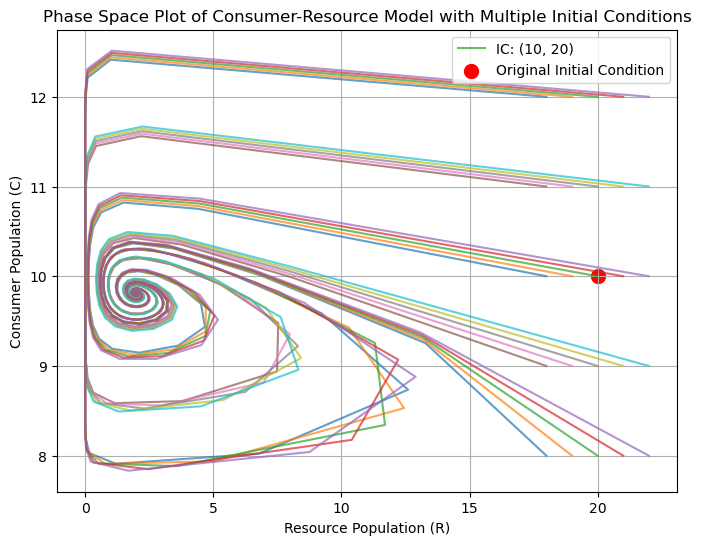

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the CRM model differential equations
def crm_model(y, t, alpha, beta, K, delta):
    C, R = y
    dCdt = alpha * C * R - beta * C
    dRdt = (K - R) * R - delta * C * R
    return [dCdt, dRdt]

# Parameters
alpha = 0.1  # Consumer growth rate per resource
beta = 0.2  # Consumer death rate
K = 100  # Resource carrying capacity
delta = 10  # Resource depletion rate by consumers

# Time points
t = np.linspace(0, 50, 500)

# Generate initial conditions around (C0=10, R0=20)
perturbations = [-2, -1, 0, 1, 2]  # Small perturbations
initial_conditions = [(10 + dC, 20 + dR) for dC in perturbations for dR in perturbations]

# Plot phase space
plt.figure(figsize=(8, 6))

for C0, R0 in initial_conditions:
    y0 = [C0, R0]
    solution = odeint(crm_model, y0, t, args=(alpha, beta, K, delta))
    C, R = solution.T
    plt.plot(R, C, alpha=0.7, label=f'IC: ({C0}, {R0})' if (C0, R0) in [(10, 20)] else "")

# Mark the original initial condition
plt.scatter([20], [10], color='red', marker='o', s=100, label='Original Initial Condition')

# Labels and title
plt.xlabel('Resource Population (R)')
plt.ylabel('Consumer Population (C)')
plt.title('Phase Space Plot of Consumer-Resource Model with Multiple Initial Conditions')
plt.legend()
plt.grid(True)
plt.show()


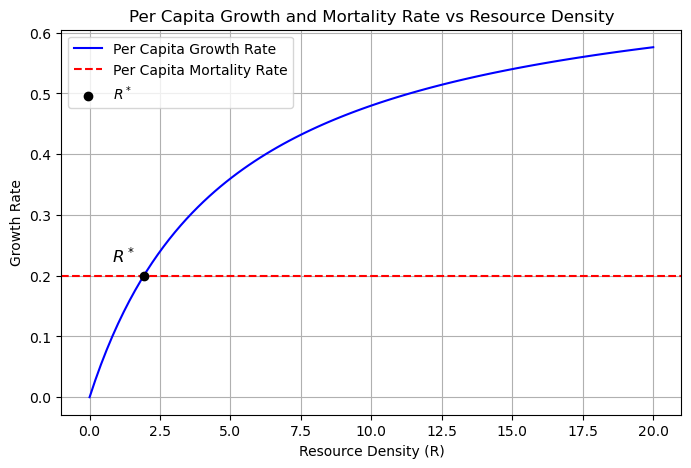

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.2   # Attack rate (consumption rate)
e = 0.6   # Conversion efficiency
h = 5     # Half-saturation constant
m = 0.2   # Mortality rate

# Resource density (R) range
R = np.linspace(0, 20, 100)

# Per capita growth rate (functional response type II)
growth_rate = (e * a * R) / (R + h)

# Per capita mortality rate (constant)
mortality_rate = np.full_like(R, m)

# Solve for R* (equilibrium point)
R_star = (m * h) / (e * a - m)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(R, growth_rate, label="Per Capita Growth Rate", color="blue")
plt.axhline(y=m, color="red", linestyle="--", label="Per Capita Mortality Rate")

# Mark the equilibrium point R*
plt.scatter(R_star, m, color="black", zorder=3, label=r"$R^*$")
plt.annotate(r"$R^*$", (R_star, m), textcoords="offset points", xytext=(-15,10), ha='center', fontsize=12)

# Labels and legend
plt.xlabel("Resource Density (R)")
plt.ylabel("Growth Rate")
plt.title("Per Capita Growth and Mortality Rate vs Resource Density")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


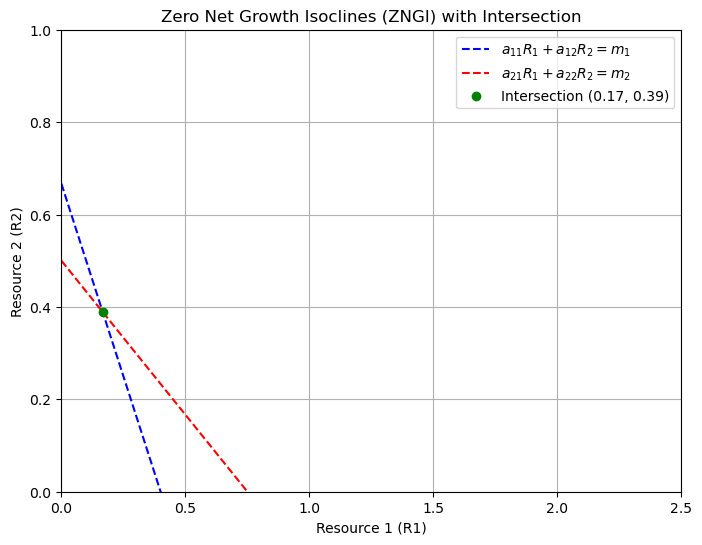

Intersection Point: R1 = 0.17, R2 = 0.39


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (chosen so the lines stay in the first quadrant)
a11, a12 = 0.5, 0.3  # Attack rates for Consumer 1
a21, a22 = 0.4, 0.6  # Attack rates for Consumer 2
m1, m2 = 0.2, 0.3  # Mortality rates

# Define x values (Resource 1)
R1_vals = np.linspace(0, 2, 100)

# Define the equations for the ZNGIs
R2_vals_C1 = (m1 - a11 * R1_vals) / a12  # dC1/dt = 0 isocline
R2_vals_C2 = (m2 - a21 * R1_vals) / a22  # dC2/dt = 0 isocline

# Calculate the intersection point by solving the system of equations
# a11 * R1 + a12 * R2 = m1
# a21 * R1 + a22 * R2 = m2
# Solving for R1 and R2 using numpy.linalg.solve for the system of equations
A = np.array([[a11, a12], [a21, a22]])
B = np.array([m1, m2])
R1_intersect, R2_intersect = np.linalg.solve(A, B)

# Plot the ZNGI lines
plt.figure(figsize=(8, 6))
plt.plot(R1_vals, R2_vals_C1, label=r"$a_{11}R_1 + a_{12}R_2 = m_1$", linestyle='dashed', color='blue')
plt.plot(R1_vals, R2_vals_C2, label=r"$a_{21}R_1 + a_{22}R_2 = m_2$", linestyle='dashed', color='red')

# Mark the intersection point
plt.scatter(R1_intersect, R2_intersect, color='green', zorder=5, label=f"Intersection ({R1_intersect:.2f}, {R2_intersect:.2f})")

# Set limits for the plot to stay within the first quadrant
plt.xlim(0, 2.5)
plt.ylim(0, 1)

# Labeling the plot
plt.xlabel("Resource 1 (R1)")
plt.ylabel("Resource 2 (R2)")
plt.title("Zero Net Growth Isoclines (ZNGI) with Intersection")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print intersection point
print(f"Intersection Point: R1 = {R1_intersect:.2f}, R2 = {R2_intersect:.2f}")


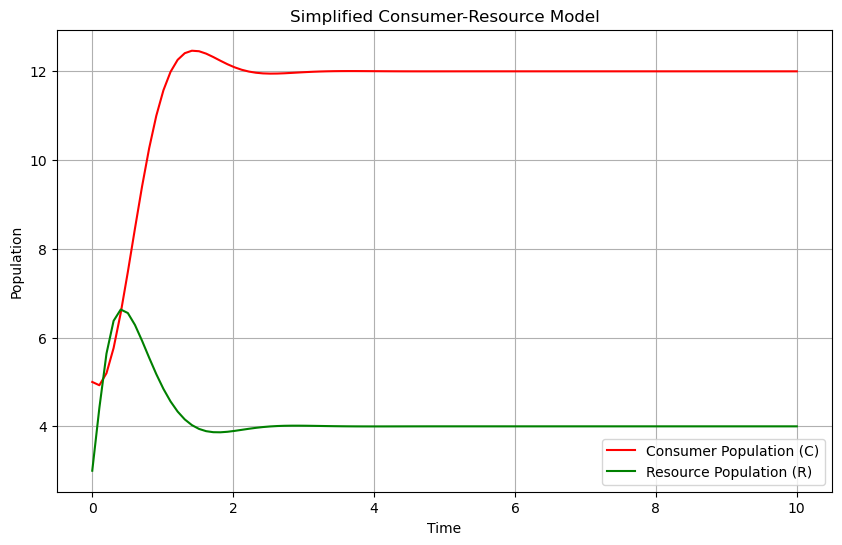

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the simplified CRM system
def crm_system(y, t, K, m):
    C, R = y
    dRdt = R * (K - R)- a * C * R # Resource growth with carrying capacity
    dCdt = (R * a - m) * C     # Consumer growth affected by resource availability
    return [dCdt, dRdt]

# Parameters
K = 10  # Carrying capacity of the resource
m = 2   # Mortality rate
a = 0.5 # consumption rate

# Initial conditions
C0 = 5   # Initial consumer population
R0 = 3   # Initial resource population
y0 = [C0, R0]

# Time vector
t = np.linspace(0, 10, 100)

# Solve the ODE system
solution = odeint(crm_system, y0, t, args=(K, m))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label="Consumer Population (C)", color='r')
plt.plot(t, solution[:, 1], label="Resource Population (R)", color='g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Simplified Consumer-Resource Model')
plt.legend()
plt.grid(True)
plt.show()


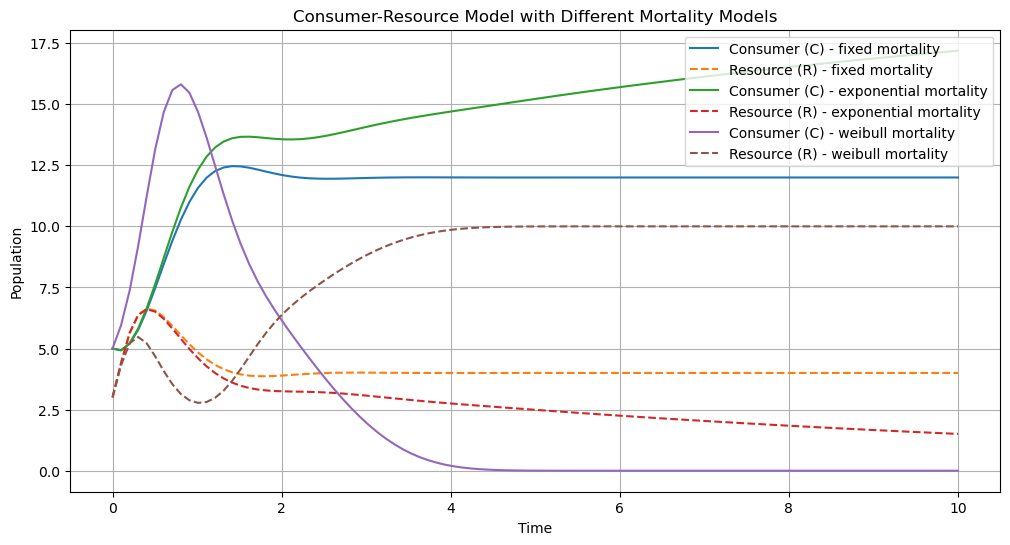

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the CRM system with different mortality types
def crm_system(y, t, K, m_type, a, m0=2, alpha=1, beta=2, lambda_=0.1):
    C, R = y
    
    # Mortality rate cases
    if m_type == "fixed":
        m = m0  # Constant mortality
    elif m_type == "exponential":
        m = m0 * np.exp(-lambda_ * t)  # Exponential decay of mortality
    elif m_type == "weibull":
        m = m0 * (t / alpha) ** (beta - 1) if t > 0 else 0  # Weibull mortality
    
    # Resource and Consumer dynamics
    dRdt = R * (K - R) - a * C * R  
    dCdt = (R * a - m) * C  
    
    return [dCdt, dRdt]

# Parameters
K = 10      # Carrying capacity of the resource
a = 0.5     # Consumption rate
m0 = 2      # Base mortality rate
alpha = 1   # Weibull scale parameter
beta = 2    # Weibull shape parameter
lambda_ = 0.1  # Exponential decay rate

# Initial conditions
C0 = 5   
R0 = 3   
y0 = [C0, R0]

# Time vector
t = np.linspace(0, 10, 100)

# Solve for different mortality models
mortality_types = ["fixed", "exponential", "weibull"]
solutions = {m_type: odeint(crm_system, y0, t, args=(K, m_type, a, m0, alpha, beta, lambda_)) for m_type in mortality_types}

# Plot the results
plt.figure(figsize=(12, 6))

for m_type in mortality_types:
    plt.plot(t, solutions[m_type][:, 0], label=f"Consumer (C) - {m_type} mortality")
    plt.plot(t, solutions[m_type][:, 1], label=f"Resource (R) - {m_type} mortality", linestyle="dashed")

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Consumer-Resource Model with Different Mortality Models')
plt.legend()
plt.grid(True)
plt.show()


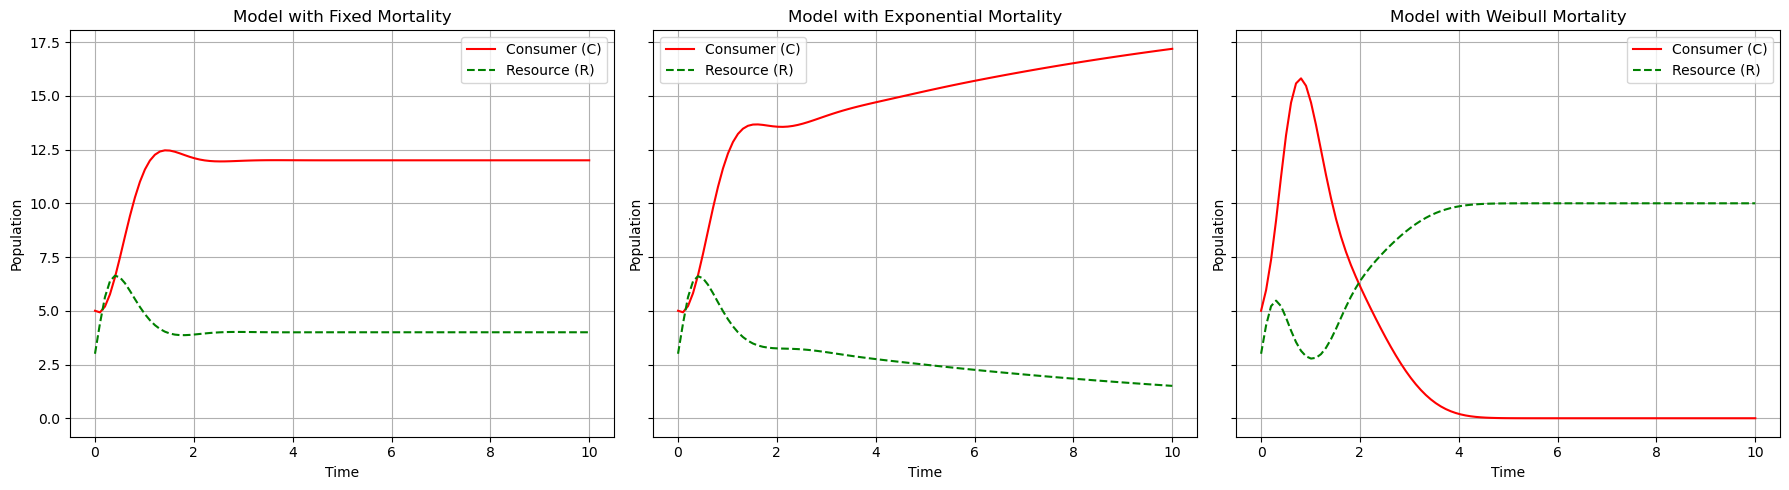

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the CRM system with different mortality types
def crm_system(y, t, K, m_type, a, m0=2, alpha=1, beta=2, lambda_=0.1):
    C, R = y
    
    # Mortality rate cases
    if m_type == "fixed":
        m = m0  # Constant mortality
    elif m_type == "exponential":
        m = m0 * np.exp(-lambda_ * t)  # Exponential decay of mortality
    elif m_type == "weibull":
        m = m0 * (t / alpha) ** (beta - 1) if t > 0 else 0  # Weibull mortality
    
    # Resource and Consumer dynamics
    dRdt = R * (K - R) - a * C * R  
    dCdt = (R * a - m) * C  
    
    return [dCdt, dRdt]

# Parameters
K = 10      # Carrying capacity of the resource
a = 0.5     # Consumption rate
m0 = 2      # Base mortality rate
alpha = 1   # Weibull scale parameter
beta = 2    # Weibull shape parameter
lambda_ = 0.1  # Exponential decay rate

# Initial conditions
C0 = 5   
R0 = 3   
y0 = [C0, R0]

# Time vector
t = np.linspace(0, 10, 100)

# Solve for different mortality models
mortality_types = ["fixed", "exponential", "weibull"]
solutions = {m_type: odeint(crm_system, y0, t, args=(K, m_type, a, m0, alpha, beta, lambda_)) for m_type in mortality_types}

# Plot each model separately
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

for ax, m_type in zip(axes, mortality_types):
    ax.plot(t, solutions[m_type][:, 0], label="Consumer (C)", color='r')
    ax.plot(t, solutions[m_type][:, 1], label="Resource (R)", color='g', linestyle="dashed")
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.set_title(f"Model with {m_type.capitalize()} Mortality")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


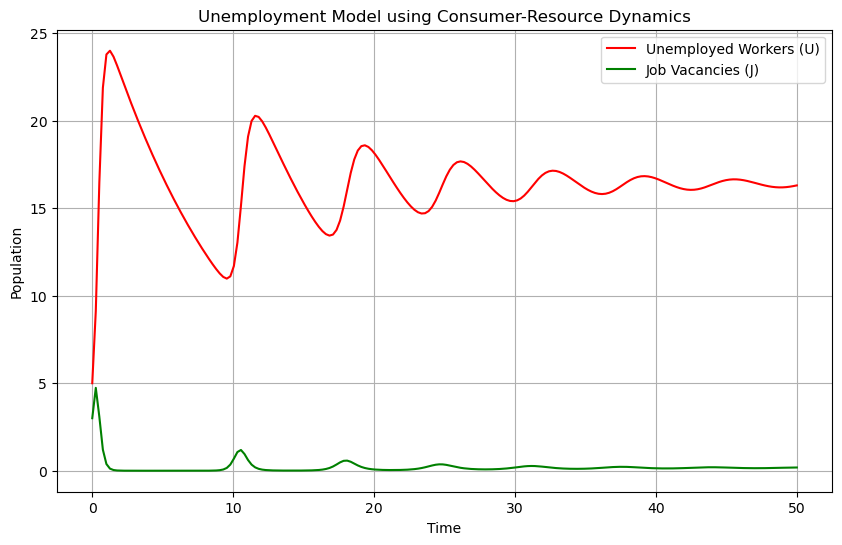

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the unemployment-based CRM system
def unemployment_model(y, t, K, a, m):
    U, J = y
    dJdt = J * (K - J) - a * U * J  # Job market growth with competition
    dUdt = (a * J - m) * U  # Unemployment change based on job availability
    return [dUdt, dJdt]

# Parameters
K = 10  # Maximum job creation rate (economic growth limit)
a = 0.6  # Job matching efficiency
m = 0.1  # Workforce dropout rate

# Initial conditions
U0 = 5  # Initial unemployed population
J0 = 3  # Initial job vacancies
y0 = [U0, J0]

# Time vector
t = np.linspace(0, 50, 200)

# Solve the ODE system
solution = odeint(unemployment_model, y0, t, args=(K, a, m))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label="Unemployed Workers (U)", color='r')
plt.plot(t, solution[:, 1], label="Job Vacancies (J)", color='g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Unemployment Model using Consumer-Resource Dynamics')
plt.legend()
plt.grid(True)
plt.show()
